In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
folder = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/complement_1223'
mae_list = []
rmse_list = []
mape_list = []
r2_list = []
# for com_len in [12]:
#     for word_len in [24]:
word_len = 12
com_len = 12

input36 = []
comple36 = []
file = folder + f'/Complement_Result{word_len}_{com_len}_output{com_len}.csv'
print(file)

df = pd.read_csv(file)
print(df.head())
# print(len(df['Position']))
# print(np.isnan(df).any())
# for i, pos in enumerate(df['Position']):
#     if pos==1.0:
#         input36.append(df['Input288'].iloc[i])
#         comple36.append(df['Complementation'].iloc[i])
# print(len(input36))
# input_min = np.array(input36).min()
# input_min_arg = np.argmin((np.array(input36)))
# print(input_min)
# print(input_min_arg)
# print(len(comple36))
# print('comple: ', comple36[:com_len*5])
# np.savetxt(f'input_{word_len}_{com_len}.csv', input36, delimiter=',')
# np.savetxt(f'comple_{word_len}_{com_len}.csv', comple36, delimiter=',')
input36 = df['Input12'][:89856]
comple36 = df['Comple12'][:89856]

mae = mean_absolute_error(input36, comple36)
rmse = mean_squared_error(input36, comple36, squared=False)
mape = mean_absolute_percentage_error(input36, comple36)
r2 = r2_score(input36, comple36)
print('MAE: ', mae)
print('RMSE: ', rmse)
print('MAPE: ', mape)
print('R2: ', r2 )
# mae_list.append(mae)
# rmse_list.append(rmse)
# mape_list.append(mape)
# r2_list.append(r2)

# print('K1C12 K2C12 K6C12 K12C12 K24C12 K1C36 K2C36 K6C36 K12C36 K24C36')
# print('MAE: ', mae_list)
# print('RMSE: ', rmse_list)
# print('MAPE: ', mape_list)
# print('R2: ', r2_list)

/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/complement_1223/Complement_Result12_12_output12.csv
   Unnamed: 0   Input288  Position   Comple12    Input12
0           0  32.917930       0.0  12.275880  11.104292
1           1  34.431610       0.0  12.055294  10.753576
2           2  36.693010       0.0  11.682368   9.627980
3           3  35.077507       0.0  12.270804   9.356650
4           4  32.064587       0.0  11.856357   9.797209
MAE:  5.995556682211955
RMSE:  8.780736560955328
MAPE:  621638.2083388618
R2:  0.9902187109777756


In [10]:
# 补全 K12C12 输入分布
a,b,c,d,e,f,g,h = [],[],[],[],[],[],[],[]
yy = []
input_array = input36
comple_array = comple36
# print(input_array)
for i, input in enumerate(input_array):
    if input<0.00001:
        a.append(input_array[i])
        yy.append(comple_array[i])
    if 0.00001<=input<0.001:
        b.append(input_array[i])
        yy.append(comple_array[i])
    elif 0.001<=input<0.1:
        c.append(input_array[i])
        yy.append(comple_array[i])
    elif 0.1<=input<1:
        d.append(input_array[i])
    elif 1<=input<10:
        e.append(input_array[i])
    elif 10<=input<50:
        f.append(input_array[i])
    elif 50<=input<100:
        g.append(input_array[i])
    else:
        h.append(input_array[i])

print(len(a) / len(input_array))
print(len(b) / len(input_array))
print(len(c) / len(input_array))
print(len(d) / len(input_array))
print(len(e) / len(input_array))
print(len(f) / len(input_array))
print(len(g) / len(input_array))
print(len(h) / len(input_array))

0.0004562856125356125
0.0008457977207977208
0.00046741452991452993
0.0019253027065527066
0.05137108262108262
0.2532719017094017
0.2393051103988604
0.4528133903133903


In [12]:
a,b,c,d,e,f,g,h = [],[],[],[],[],[],[],[]
yy = []
yyy = []
# print(input_array)
for i, input in enumerate(input_array):
    if input<=1:
        a.append(input)
        yy.append(comple_array[i])
    else:
        b.append(input)
        yyy.append(comple_array[i])
print(len(a))
print(len(yy))
print(len(b))
print(len(yyy))
mape2 = mean_absolute_percentage_error(b, yyy)
mae2 = mean_absolute_error(b, yyy)
rmse2 = mean_squared_error(b, yyy, squared=False)
r22 = r2_score(b, yyy)
print(mae2)
print(rmse2)
print(mape2)
print(r22)

332
332
89524
89524
5.977374590894063
8.768976063242004
0.14211129678628137
0.9902250161265717


In [12]:
folder = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/complementation_result'
mae_list = []
rmse_list = []
mape_list = []
r2_list = []
# for com_len in [12]:
#     for word_len in [24]:
word_len = 6
com_len = 12

input36 = []
comple36 = []
file = folder + f'/Complement_Result{word_len}_{com_len}_0.csv'
print(file)

df = pd.read_csv(file)
print(df.head())
print(len(df['Position']))
print(np.isnan(df).any())
for i, pos in enumerate(df['Position']):
    if pos==1.0:
        input36.append(df['Input288'].iloc[i])
        comple36.append(df['Complementation'].iloc[i])
print(len(input36))
input_min = np.array(input36).min()
input_min_arg = np.argmin((np.array(input36)))
print(input_min)
print(input_min_arg)
print(len(comple36))
# print('comple: ', comple36[:com_len*5])
# np.savetxt(f'input_{word_len}_{com_len}.csv', input36, delimiter=',')
# np.savetxt(f'comple_{word_len}_{com_len}.csv', comple36, delimiter=',')
mae = mean_absolute_error(input36, comple36)
rmse = mean_squared_error(input36, comple36, squared=False)
mape = mean_absolute_percentage_error(input36, comple36)
r2 = r2_score(input36, comple36)
mae_list.append(mae)
rmse_list.append(rmse)
mape_list.append(mape)
r2_list.append(r2)

print('K1C12 K2C12 K6C12 K12C12 K24C12 K1C36 K2C36 K6C36 K12C36 K24C36')
print('MAE: ', mae_list)
print('RMSE: ', rmse_list)
print('MAPE: ', mape_list)
print('R2: ', r2_list)


/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/complementation_result/Complement_Result6_12_0.csv
   Unnamed: 0  Complementation   Input288  Input48  Position
0           0        35.750294  32.917930      0.0       0.0
1           1        36.955853  34.431610      0.0       0.0
2           2        37.220700  36.693010      0.0       0.0
3           3        35.147266  35.077507      0.0       0.0
4           4        33.831703  32.064587      0.0       0.0
2156544
Unnamed: 0         False
Complementation    False
Input288           False
Input48            False
Position           False
dtype: bool
89856
6.079969299999999e-10
9515
89856
K1C12 K2C12 K6C12 K12C12 K24C12 K1C36 K2C36 K6C36 K12C36 K24C36
MAE:  [7.066628369462033]
RMSE:  [9.635185633970243]
MAPE:  [1758287.7744988254]
R2:  [0.9877031483472487]


In [13]:
file = '/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/1126/Complement_Result6_12_0.csv'
# for chunk in pd.read_csv(file, chunksize=288):
df = pd.read_csv(file)
df1 = df[df['Position']==1.0]
df1.to_excel('/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/1126/6_12_0.xlsx')

In [14]:
df.shape

(2156544, 5)

In [15]:
df1.shape

(89856, 5)

In [16]:
a,b,c,d,e,f,g,h = [],[],[],[],[],[],[],[]
yy = []
yyy = []
input_array = list(df1['Input288'])
comple_array = list(df1['Complementation'])
# print(input_array)
for i, input in enumerate(input_array):
    if input<=1:
        a.append(input)
        yy.append(comple_array[i])
    else:
        b.append(input)
        yyy.append(comple_array[i])
print(len(a))
print(len(yy))
print(len(b))
print(len(yyy))
mape1 = mean_absolute_percentage_error(a, yy)
mape2 = mean_absolute_percentage_error(b, yyy)
mae2 = mean_absolute_error(b, yyy)
rmse2 = mean_squared_error(b, yyy, squared=False)
r22 = r2_score(b, yyy)
print(mae2)
print(rmse2)
print(mape2)
print(r22)

373
373
89483
89483
7.023714893713364
9.547173149342003
0.15909727317226224
0.9878996498382316


In [34]:
# 补全 K24C12 输入分布
a,b,c,d,e,f,g,h = [],[],[],[],[],[],[],[]
yy = []
input_array = list(df1['Input288'])
comple_array = list(df1['Complementation'])
# print(input_array)
for i, input in enumerate(input_array):
    if input<0.00001:
        a.append(input_array[i])
        yy.append(comple_array[i])
    if 0.00001<=input<0.001:
        b.append(input_array[i])
        yy.append(comple_array[i])
    elif 0.001<=input<0.1:
        c.append(input_array[i])
        yy.append(comple_array[i])
    elif 0.1<=input<1:
        d.append(input_array[i])
    elif 1<=input<10:
        e.append(input_array[i])
    elif 10<=input<50:
        f.append(input_array[i])
    elif 50<=input<100:
        g.append(input_array[i])
    else:
        h.append(input_array[i])

In [35]:
print(len(a) / len(df1['Input288']))
print(len(b) / len(df1['Input288']))
print(len(c) / len(df1['Input288']))
print(len(d) / len(df1['Input288']))
print(len(e) / len(df1['Input288']))
print(len(f) / len(df1['Input288']))
print(len(g) / len(df1['Input288']))
print(len(h) / len(df1['Input288']))

0.0006788639601139602
0.000968215811965812
0.000734508547008547
0.001880787037037037
0.05883858618233618
0.28626914173789175
0.24091880341880342
0.41038995726495725


In [37]:
print(yy)

[3.1787902999999997, -0.93565774, -1.5217032, -1.7081243000000002, 6.057506, 5.0957932, 4.0666547, 2.3917203, -2.6921522999999996, -10.120265, -2.0852282, -2.2005908, -0.97703356, 0.93494433, 3.0117347000000003, -3.5781775000000002, 4.4567904, 6.2835529999999995, 4.0350676, 4.8186855, 8.164361, 8.599641, 10.339363, 16.562569, 13.625129000000001, 9.743803, 7.9232397, 8.20336, 9.876155, 2.2854269, 14.302152, 15.833979000000001, 12.736286, -14.135585999999998, -5.1962624, -8.014992, 11.94098, 2.80823, 8.181414, 5.194311, 2.7392792999999998, 1.6100762, 13.295364000000001, 11.806225, 10.51876, 22.518906, 24.58316, 3.6644495000000004, 6.6577915999999995, 7.0116935, 3.5690513, 4.7977742999999995, 4.778867, 7.525396300000001, 5.4971676, 7.256752499999999, 2.7813776000000003, 12.018048, 9.992552, 14.544285999999998, 14.771809, 15.036052999999999, 11.059444000000001, 14.824735999999998, 12.423009, 12.773992, 14.030057000000001, 12.678803, 8.625958, 13.547253, 6.1791334, 9.500911, 8.29927, 1.4332

[0.056074766355140186, 0.0, 0.004672897196261682, 0.43457943925233644, 0.5046728971962616, 0.0]


<BarContainer object of 6 artists>

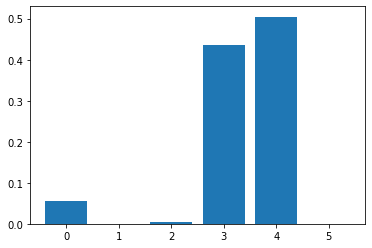

In [39]:
aa, bb,cc,dd,ee,ff = [],[],[],[],[],[]
for y in yy:
    if y<0:
        aa.append(y)
    elif 0<=y<0.1:
        bb.append(y)
    elif 0.1<=y<1:
        cc.append(y)
    elif 1<=y<10:
        dd.append(y)
    elif 10<=y<50:
        ee.append(y)
    else:
        ff.append(y)
x = np.arange(6)
Y = [len(m)/len(yy) for m in [aa,bb,cc,dd,ee,ff]]
print(Y)
plt.bar(x, height=Y)

In [25]:
y = [len(m)/len(df1['Input288']) for m in [a,b,c,d,e,f,g]]
x = np.arange(7)

<BarContainer object of 7 artists>

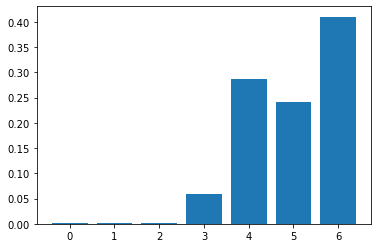

In [26]:
plt.bar(x, height=y)

[0.0, 1.112891737891738e-05, 1.112891737891738e-05, 0.012364227207977209, 0.30945067663817666, 0.26617031695156695, 0.41199252136752135]


<BarContainer object of 7 artists>

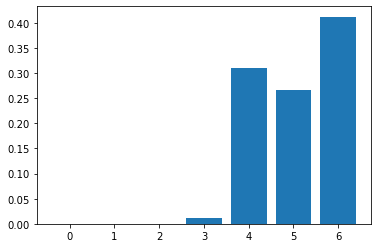

In [31]:
# 补全 K24C12 结果分布
a,b,c,d,e,f,g = [],[],[],[],[],[],[]
input_array = list(df1['Complementation'])
for i, input in enumerate(input_array):
    if 0.00001<=input<0.001:
        a.append(input_array[i])
    elif 0.001<=input<0.1:
        b.append(input_array[i])
    elif 0.1<=input<1:
        c.append(input_array[i])
    elif 1<=input<10:
        d.append(input_array[i])
    elif 10<=input<50:
        e.append(input_array[i])
    elif 50<=input<100:
        f.append(input_array[i])
    else:
        g.append(input_array[i])
y = [len(m)/len(df1['Input288']) for m in [a,b,c,d,e,f,g]]
x = np.arange(7)
print(y)
plt.bar(x, y)

[0.0, 0.0, 0.00010850694444444444, 0.08906750801282051, 0.29154981303418803, 0.3022753071581197, 0.31699886485042733]


<BarContainer object of 7 artists>

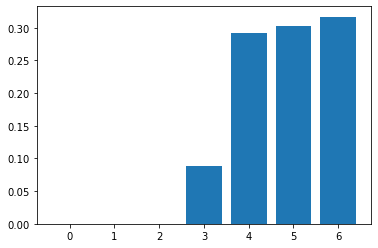

In [32]:
# 预测 K24P12 输入分布
df2 = pd.read_csv('/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_result_step36/24_12_0.1_step36.csv')
a,b,c,d,e,f,g = [],[],[],[],[],[],[]
input_array = list(df2['Input'])
for i, input in enumerate(input_array):
    if 0.00001<=input<0.001:
        a.append(input_array[i])
    elif 0.001<=input<0.1:
        b.append(input_array[i])
    elif 0.1<=input<1:
        c.append(input_array[i])
    elif 1<=input<10:
        d.append(input_array[i])
    elif 10<=input<50:
        e.append(input_array[i])
    elif 50<=input<100:
        f.append(input_array[i])
    else:
        g.append(input_array[i])
y = [len(m)/len(df2['Input']) for m in [a,b,c,d,e,f,g]]
x = np.arange(7)
print(y)
plt.bar(x, y)

[0.0, 0.00025874732905982906, 0.004507211538461538, 0.11048510950854701, 0.2588474893162393, 0.312099358974359, 0.3138020833333333]


<BarContainer object of 7 artists>

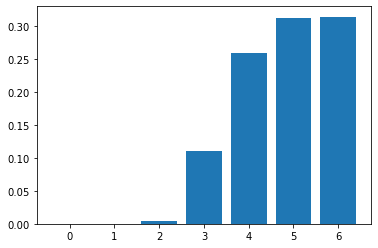

In [33]:
# 预测 K24P12 结果分布
df2 = pd.read_csv('/Users/gengyunxin/Documents/项目/traffic_model/TVTS_9.28/finetune/test_result_all/prediction_result_step36/24_12_0.1_step36.csv')
a,b,c,d,e,f,g = [],[],[],[],[],[],[]
input_array = list(df2['Predict'])
for i, input in enumerate(input_array):
    if 0.00001<=input<0.001:
        a.append(input_array[i])
    elif 0.001<=input<0.1:
        b.append(input_array[i])
    elif 0.1<=input<1:
        c.append(input_array[i])
    elif 1<=input<10:
        d.append(input_array[i])
    elif 10<=input<50:
        e.append(input_array[i])
    elif 50<=input<100:
        f.append(input_array[i])
    else:
        g.append(input_array[i])
y = [len(m)/len(df2['Predict']) for m in [a,b,c,d,e,f,g]]
x = np.arange(7)
print(y)
plt.bar(x, y)

In [8]:
def cal_mape(true, predict, num):
    return (sum(abs(true - predict) / (true + 1e-6))) / num

In [9]:
num = len(df1['Position'])
num

89856

In [10]:
mape = cal_mape(df1['Input288'], df1['Complementation'], num)
mape

7037.801319921469

In [12]:
input12 = [32.1,32.6,
33.5,
33.9,
33.4,
34.8,
36.5,
37.6,
39.199997,
40.3,
41.8,
41.600002]
comple12 = [36.199474,
34.52239,
35.43811,
36.267235,
36.336258,
36.99513,
37.765316,
39.69525,
40.87546,
41.074806,
43.013424,
41.52923]
mape = mean_absolute_percentage_error(input12, comple12)
mape

0.05403680365104907

In [13]:
mae = mean_absolute_error(input12, comple12)
mae

1.8794690000000014

In [14]:
rmse = mean_squared_error(input12, comple12, squared=False)
rmse

2.1248049575134744

In [15]:
r2 = r2_score(input12, comple12)
r2

0.6125447000859008